# Binary catch

**При каких условиях два тела, налетающие друг на друга с бесконечности (в системе центра масс) станут связной системой из-за испускания гравволн?**

In [1508]:
(* https://mathematica.stackexchange.com/questions/850/how-do-i-clear-all-user-defined-symbols/861#861 *)
<< Utilities`CleanSlate`
CleanSlate[];

ClearAll["Global`*"]
(* ClearSystemCache[] *)
(* https://mathematica.stackexchange.com/questions/111605/quit-vs-clearallglobal *)
if[Length[Names["Global`*"]] > 0, Remove["Global`*"]];

(* PacletInstall[
    "TensorSimplify",

    "Site" -> "http://raw.githubusercontent.com/carlwoll/TensorSimplify/master"
]*)
<<TensorSimplify`

  (CleanSlate) Contexts purged: {Global`}
  (CleanSlate) Approximate kernel memory recovered: 48 Kb


## Einstein Summation

In [1517]:
ClearAll@EinsteinSummation

EinsteinSummation[in_List, arrays_] := Module[
  {res =
    isum[in -> Cases[Tally @ Flatten @ in, {_, 1}][[All, 1]], arrays]},
  res /; res =!= $Failed
  ]

EinsteinSummation[in_List -> out_, arrays_] := Module[
  {res = isum[in -> out, arrays]},
  res /; res =!= $Failed
  ]

isum[in_List -> out_, arrays_List] := Catch@Module[
  {indices, contracted, uncontracted, contractions, transpose},
  If[Length[in] != Length[arrays],
    Message[EinsteinSummation::length, Length[in], Length[arrays]];
    Throw[$Failed]];
  MapThread[
    If[IntegerQ@TensorRank[#1] && Length[#1] != TensorRank[#2],
      Message[EinsteinSummation::shape, #1, #2];
      Throw[$Failed]] &, {in, arrays}];
  indices = Tally[Flatten[in, 1]];
  If[DeleteCases[indices, {_, 1 | 2}] =!= {},
    Message[EinsteinSummation::repeat,
      Cases[indices, {x_, Except[1 | 2]} :> x]];
    Throw[$Failed]];
  uncontracted = Cases[indices, {x_, 1} :> x];
  If[Sort[uncontracted] =!= Sort[out],
    Message[EinsteinSummation::output, uncontracted, out];
    Throw[$Failed]];
  contracted = Cases[indices, {x_, 2} :> x];
  contractions = Flatten[Position[Flatten[in, 1], #]] & /@ contracted;
  transpose = FindPermutation[uncontracted, out];
  Activate@
    TensorTranspose[
      TensorContract[Inactive[TensorProduct] @@ arrays, contractions],
    transpose]]

EinsteinSummation::length =
  "Number of index specifications (`1`) does not match the number of \
tensors (`2`)";
EinsteinSummation::shape =
  "Index specification `1` does not match the tensor rank of `2`";
EinsteinSummation::repeat =
  "Index specifications `1` are repeated more than twice";
EinsteinSummation::output =
  "The uncontracted indices don't match the desired output";

In [1734]:
Unprotect[Subscript, OverHat, Derivative];

(* Правила для скрытия аргументов в TraditionalForm *)

MakeBoxes[OverHat[r_][OverHat[t]], TraditionalForm] :=
  MakeBoxes[OverHat[r], TraditionalForm]
MakeBoxes[\[Phi][OverHat[t]], TraditionalForm] :=
  MakeBoxes[\[Phi], TraditionalForm]

MakeBoxes[Subscript[OverHat[r], n_][OverHat[t]], TraditionalForm] :=
  SubscriptBox[OverscriptBox["r", "^"], ToString[n]];

MakeBoxes[OverHat[\[Omega]][OverHat[t]], TraditionalForm] :=
  OverscriptBox["\[Omega]", "^"];

MakeBoxes[Derivative[n_][f_][OverHat[t]], TraditionalForm] := Module[{primes},
  primes = StringJoin[Table["\[Prime]", n]];
  SuperscriptBox[ToBoxes[f], primes]
];

Protect[Subscript, OverHat, Derivative];

$\hat{r}_k$

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         TagBox[GridBox[{{RowBox[{OverscriptBox["r", "^"], " ", 

 
>               RowBox[{"cos", "(", "ϕ", ")"}]}]}, 

 
>            {RowBox[{OverscriptBox["r", "^"], " ", RowBox[{"sin", "(", "ϕ", ")"}]}]}}, 

 
>           Rule[RowSpacings, 1], Rule[ColumnAlignments, Center], 

 
>           Rule[ColumnAlignments, Left]], Column], "⁠", ")"}], 

 
>       Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
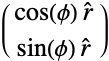

In [1743]:
rh = {OverHat[r][OverHat[t]]*Cos[\[Phi][OverHat[t]]], OverHat[r][OverHat[t]]*Sin[\[Phi][OverHat[t]]]};
rh // MatrixForm // TraditionalForm

In [1745]:
$Assumptions = {
  {OverHat[r][OverHat[t]], OverHat[t], rh} \[Element] PositiveReals
};

## Система движения в декартовых координатах
$$
\frac{d^2r_k}{dt^2} = -\frac{G(m_A+m_B)}{r^3}r_k - \frac{2}{5}f_{ki}^{(5)}r_i
$$

Ч.Мизнер, К.Торн, Дж.Уилер Гравтация, Т.3 (36.8)

Введём обозначения для масс

$$
M=m_A+m_B; \quad
\mu = m_{AB} = \frac{m_A m_B}{M}
$$

### Безразмерные единицы длины
$$
\begin{align}
r &= b\hat{r} \\
t &= t_0\hat{t} \\
f_{ij} &= b^2\hat{f}_{ij} \\
f_{ij}^{(5)} &= \frac{b^2}{t_0^5}\hat{f}_{ij}^{(5)}
\end{align}
$$

$\hat{f}_{ki}$

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         GridBox[{{RowBox[{FractionBox["1", "6"], " ", 

 
>              SuperscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>              RowBox[{"(", RowBox[{RowBox[{"3", " ", 

 
>                    RowBox[{"cos", "(", RowBox[{"2", " ", "ϕ"}], ")"}]}], "+",\
 
>    "1"}]\
, ")"}]}], RowBox[{SuperscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>              RowBox[{"sin", "(", "ϕ", ")"}], " ", RowBox[{"cos", "(", "ϕ", ")"}]}]}, 

 
>           {RowBox[{SuperscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>              RowBox[{"sin", "(", "ϕ", ")"}], " ", RowBox[{"cos", "(", "ϕ", ")"}]}], 

 
>            RowBox[{FractionBox["1", "3"], " ", 

 
>              SuperscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>              RowBox[{"(", RowBox[{RowBox[{"3", " ", 

 
>                    RowBox[{SuperscriptBox["sin", "2"], "(", "ϕ", ")"}]}], "-", "1"}], 

 
>                ")"}]}]}}, Rule[RowSpacings, 1], Rule[ColumnSpacings, 1], 

 
>          Rule[RowAlignments, Baseline], Rule[ColumnAlignments, Center]], "⁠", ")"}], 

 
>       Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
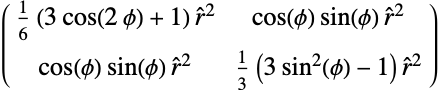

In [1747]:
fh = Simplify[Array[rh[[#]]*rh[[#2]] - 1/3*KroneckerDelta[#, #2]*(OverHat[r][OverHat[t]])^2 &, {2, 2}], Trig -> True];
fh // MatrixForm // TraditionalForm

$\hat{f}_{ki}^{(5)}$

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         GridBox[{{TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>               RowBox[List["x", ",", "x"]]], "\"(5)\""], "Superscript", 

 
>             Rule[SyntaxForm, SuperscriptBox]], 

 
>            TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>               RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>             Rule[SyntaxForm, SuperscriptBox]]}, 

 
>           {TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>               RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>             Rule[SyntaxForm, SuperscriptBox]], 

 
>            TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>               RowBox[List["y", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>             Rule[SyntaxForm, SuperscriptBox]]}}, Rule[RowSpacings, 1], 

 
>          Rule[ColumnSpacings, 1], Rule[RowAlignments, Baseline], 

 
>          Rule[ColumnAlignments, Center]], "⁠", ")"}], 

 
>       Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
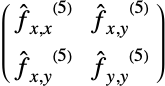

In [1751]:
(* fh5 = Array[Superscript[Subscript[OverHat[f], {x, y}[[#1]], {x, y}[[#2]]], "(5)"] &, {2, 2}] *)
(* Symmetric version *)
fh5 = Array[If[#1 <= #2,
                    Superscript[Subscript[OverHat[f], {x, y}[[#1]], {x, y}[[#2]]], "(5)"],
                    Superscript[Subscript[OverHat[f], {x, y}[[#2]], {x, y}[[#1]]], "(5)"]] &, {2, 2}];
fh5 // MatrixForm // TraditionalForm

$\hat{f}_{ki}^{(5)}\hat{r}_i$

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         TagBox[GridBox[{{RowBox[{RowBox[{OverscriptBox["r", "^"], " ", 

 
>                 RowBox[{"sin", "(", "ϕ", ")"}], " ", 

 
>                 TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                    RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                  Rule[SyntaxForm, SuperscriptBox]]}], "+", 

 
>               RowBox[{OverscriptBox["r", "^"], " ", RowBox[{"cos", "(", "ϕ", ")"}], 

 
>                 " ", TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                    RowBox[List["x", ",", "x"]]], "\"(5)\""], "Superscript", 

 
>                  Rule[SyntaxForm, SuperscriptBox]]}]}]}, 

 
>            {RowBox[{RowBox[{OverscriptBox["r", "^"], " ", 

 
>                 RowBox[{"cos", "(", "ϕ", ")"}], " ", 

 
>                 TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                    RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                  Rule[SyntaxForm, SuperscriptBox]]}], "+", 

 
>               RowBox[{OverscriptBox["r", "^"], " ", RowBox[{"sin", "(", "ϕ", ")"}], 

 
>                 " ", TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                    RowBox[List["y", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                  Rule[SyntaxForm, SuperscriptBox]]}]}]}}, Rule[RowSpacings, 1], 

 
>           Rule[ColumnAlignments, Center], Rule[ColumnAlignments, Left]], Column], "⁠",\
 
>    
      ")"}], Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
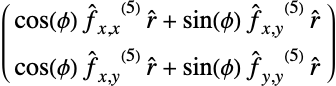

In [1758]:
fh5rh = EinsteinSummation[{{k, i}, {i}}, {fh5, rh}];
fh5rh // MatrixForm // TraditionalForm

Система движения в безразмерной записи будет выглядеть как

$$
\frac{d^2\hat{r}_k}{d\hat{t}^2} = -\frac{t_0^2}{b^3}\frac{GM}{\hat{r}^3}\hat{r}_k - \frac{2}{5}\frac{b^2}{t_0^3}\hat{f}_{ki}^{(5)}\hat{r}_i
$$

Пусть $t_0 = \sqrt{\frac{b^3}{GM}}$, а $b$ - прицельное расстояние, тогда система движения перепишется как

$$
\frac{d^2\hat{r}_k}{d\hat{t}^2} + \frac{\hat{r}_k}{\hat{r}^3} = - \frac{2}{5}\epsilon_G\hat{f}_{ki}^{(5)}\hat{r}_i\quad,
$$
или
$$
\hat{r}_k^{(2)} + \frac{\hat{r}_k}{\hat{r}^3} = - \frac{2}{5}\epsilon_G\hat{f}_{ki}^{(5)}\hat{r}_i\quad,
$$

где $ \epsilon_G = \frac{b^2}{t_0^3} = \frac{1}{b} \left( \frac{GM}{b} \right)^{\frac{3}{2}}$.

## Повернём систему с помощью матрицы вращения $R_{ij}(\phi)$ на угол $\phi$ по **часовой** стрелке
Переход к полярным координатам от декартовых

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         GridBox[{{RowBox[{"cos", "(", "ϕ", ")"}], RowBox[{"sin", "(", "ϕ", ")"}]}, 

 
>           {RowBox[{"-", RowBox[{"sin", "(", "ϕ", ")"}]}], 

 
>            RowBox[{"cos", "(", "ϕ", ")"}]}}, Rule[RowSpacings, 1], 

 
>          Rule[ColumnSpacings, 1], Rule[RowAlignments, Baseline], 

 
>          Rule[ColumnAlignments, Center]], "⁠", ")"}], 

 
>       Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
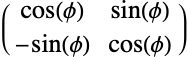

In [1759]:
RotationMatrix[-\[Phi]] // MatrixForm // TraditionalForm

#### LHS системы после поворота

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         TagBox[GridBox[{{RowBox[{RowBox[{SuperscriptBox["r", "′′", 

 
>                  Rule[MultilineFunction, None]], " ", 

 
>                 RowBox[{"cos", "(", "ϕ", ")"}]}], "-", 

 
>               RowBox[{"2", " ", SuperscriptBox["r", "′", 

 
>                  Rule[MultilineFunction, None]], " ", SuperscriptBox["ϕ", "′"], 

 
>                 " ", RowBox[{"sin", "(", "ϕ", ")"}]}], "+", 

 
>               RowBox[{OverscriptBox["r", "^"], " ", 

 
>                 RowBox[{"(", RowBox[{RowBox[{SuperscriptBox[RowBox[

 
>                         {"(", SuperscriptBox["ϕ", "′"], ")"}], "2"], " ", 

 
>                       RowBox[{"(", 

 
>                         RowBox[{"-", RowBox[{"cos", "(", "ϕ", ")"}]}], ")"}]}], 

 
>                     "-", RowBox[{SuperscriptBox["ϕ", "′′"], " ", 

 
>                       RowBox[{"sin", "(", "ϕ", ")"}]}]}], ")"}]}], "+", 

 
>               FractionBox[RowBox[{"cos", "(", "ϕ", ")"}], 

 
>                SuperscriptBox[OverscriptBox["r", "^"], "2"]]}]}, 

 
>            {RowBox[{RowBox[{SuperscriptBox["r", "′′", 

 
>                  Rule[MultilineFunction, None]], " ", 

 
>                 RowBox[{"sin", "(", "ϕ", ")"}]}], "+", 

 
>               RowBox[{"2", " ", SuperscriptBox["r", "′", 

 
>                  Rule[MultilineFunction, None]], " ", SuperscriptBox["ϕ", "′"], 

 
>                 " ", RowBox[{"cos", "(", "ϕ", ")"}]}], "+", 

 
>               RowBox[{OverscriptBox["r", "^"], " ", 

 
>                 RowBox[{"(", RowBox[{RowBox[{SuperscriptBox["ϕ", "′′"], " ", 

 
>                       RowBox[{"cos", "(", "ϕ", ")"}]}], "-", 

 
>                     RowBox[{SuperscriptBox[RowBox[{"(", 

 
>                          SuperscriptBox["ϕ", "′"], ")"}], "2"], " ", 

 
>                       RowBox[{"sin", "(", "ϕ", ")"}]}]}], ")"}]}], "+", 

 
>               FractionBox[RowBox[{"sin", "(", "ϕ", ")"}], 

 
>                SuperscriptBox[OverscriptBox["r", "^"], "2"]]}]}}, 

 
>           Rule[RowSpacings, 1], Rule[ColumnAlignments, Center], 

 
>           Rule[ColumnAlignments, Left]], Column], "⁠", ")"}], 

 
>       Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
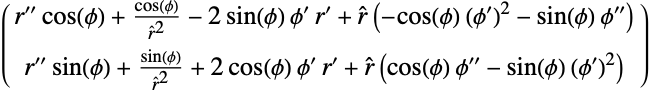

In [1761]:
LHSMotion = D[rh, {OverHat[t], 2}] + Simplify[rh / Norm[rh]^3];
LHSMotion // MatrixForm // TraditionalForm

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         TagBox[GridBox[{{RowBox[{SuperscriptBox["r", "′′", 

 
>                Rule[MultilineFunction, None]], "-", 

 
>               RowBox[{RowBox[{OverscriptBox["r", "^"]}], " ", 

 
>                 SuperscriptBox[RowBox[{"(", SuperscriptBox["ϕ", "′"], ")"}],\
 
>    "2"]}]\
, "+", FractionBox["1", SuperscriptBox[OverscriptBox["r", "^"], "2"]]}]}, 

 
>            {RowBox[{RowBox[{"2", " ", 

 
>                 SuperscriptBox["r", "′", Rule[MultilineFunction, None]], " ", 

 
>                 SuperscriptBox["ϕ", "′"]}], "+", 

 
>               RowBox[{OverscriptBox["r", "^"], " ", SuperscriptBox["ϕ", "′′"]}]}]}}, 

 
>           Rule[RowSpacings, 1], Rule[ColumnAlignments, Center], 

 
>           Rule[ColumnAlignments, Left]], Column], "⁠", ")"}], 

 
>       Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
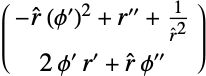

In [1762]:
RotatedLHSMotion = Simplify[RotationMatrix[-\[Phi][OverHat[t]]] . LHS, Trig -> True] // MatrixForm // TraditionalForm

Так как $\hat{\omega} \equiv \phi^{(1)}$, то

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         TagBox[GridBox[{{RowBox[{RowBox[{RowBox[{"-", OverscriptBox["r", "^"]}], 

 
>                 " ", SuperscriptBox[OverscriptBox["ω", "^"], "2"]}], "+", 

 
>               SuperscriptBox["r", "′′", Rule[MultilineFunction, None]], "+", 

 
>               FractionBox["1", SuperscriptBox[OverscriptBox["r", "^"], "2"]]}]}, 

 
>            {RowBox[{RowBox[{"2", " ", OverscriptBox["ω", "^"], " ", 

 
>                 SuperscriptBox["r", "′", Rule[MultilineFunction, None]]}], "+", 

 
>               RowBox[{OverscriptBox["r", "^"], " ", 

 
>                 SuperscriptBox["ω", "′", Rule[MultilineFunction, None]]}]}]}}, 

 
>           Rule[RowSpacings, 1], Rule[ColumnAlignments, Center], 

 
>           Rule[ColumnAlignments, Left]], Column], "⁠", ")"}], 

 
>       Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
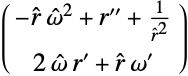

In [1764]:
OmegaReplace = Derivative[n_][\[Phi]][OverHat[t]] :> Derivative[n-1][OverHat[\[Omega]]][OverHat[t]];

OmegaLHSMotion = RotatedLHSMotion /. OmegaReplace // TraditionalForm

### RHS системы после поворота

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         TagBox[GridBox[{{RowBox[{RowBox[{"-", FractionBox["2", "5"]}], " ", 

 
>               OverscriptBox["r", "^"], " ", SubscriptBox["ϵ", "G"], " ", 

 
>               RowBox[{"(", RowBox[{RowBox[{RowBox[{"sin", "(", 

 
>                       RowBox[{"2", " ", "ϕ"}], ")"}], " ", 

 
>                     TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                        RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                      Rule[SyntaxForm, SuperscriptBox]]}], "+", 

 
>                   RowBox[{RowBox[{SuperscriptBox["cos", "2"], "(", "ϕ", ")"}], 

 
>                     " ", TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                        RowBox[List["x", ",", "x"]]], "\"(5)\""], "Superscript", 

 
>                      Rule[SyntaxForm, SuperscriptBox]]}], "+", 

 
>                   RowBox[{RowBox[{SuperscriptBox["sin", "2"], "(", "ϕ", ")"}], 

 
>                     " ", TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                        RowBox[List["y", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                      Rule[SyntaxForm, SuperscriptBox]]}]}], ")"}]}]}, 

 
>            {RowBox[{RowBox[{"-", FractionBox["1", "5"]}], " ", 

 
>               OverscriptBox["r", "^"], " ", SubscriptBox["ϵ", "G"], " ", 

 
>               RowBox[{"(", RowBox[{RowBox[{RowBox[{"sin", "(", 

 
>                       RowBox[{"2", " ", "ϕ"}], ")"}], " ", 

 
>                     RowBox[{"(", RowBox[{TemplateBox[List[SubscriptBox[

 
>                            OverscriptBox["f", "^"], 

 
>                            RowBox[List["y", ",", "y"]]], "\"(5)\""], 

 
>                          "Superscript", Rule[SyntaxForm, SuperscriptBox]], "-", 

 
>                         TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                            RowBox[List["x", ",", "x"]]], "\"(5)\""], 

 
>                          "Superscript", Rule[SyntaxForm, SuperscriptBox]]}], ")"}]}\

 
>   ], "+", RowBox[{"2", " ", RowBox[{"cos", "(", RowBox[{"2", " ", "ϕ"}], ")"}], 

 
>                     " ", TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                        RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                      Rule[SyntaxForm, SuperscriptBox]]}]}], ")"}]}]}}, 

 
>           Rule[RowSpacings, 1], Rule[ColumnAlignments, Center], 

 
>           Rule[ColumnAlignments, Left]], Column], "⁠", ")"}], 

 
>       Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
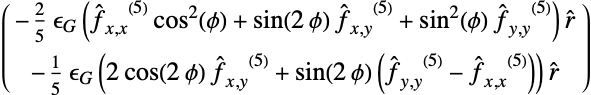

In [1766]:
RHSMotion = -2/5 Subscript[\[Epsilon], G] FullSimplify[RotationMatrix[-\[Phi][OverHat[t]]] . fh5rh, Trig -> True];
RHSMotion // MatrixForm // TraditionalForm

<span style="color:red">**NB:**</span> Полученные выражения <span style="color:green">**совпадают**</span> с уравнениями (10) и (9) из файла Binary.pdf

## Получим теперь **энергетическую** систему уравнений

В задача двух тел без учёта гравитационного излучения в системе центра масс в полярных координатах радиус-вектор $\hat{r}_k$ задаётся как:
$$
\hat{r}_k = \hat{r} e_{1k} \quad,
$$
где:
- $\hat{r}$ — расстояние между телами,
- $e_{1k}$ — единичный вектор в направлении $\hat{r}_k$.

Скорость в полярных координатах выражается как:
$$
\hat{r}_k^{(1)} = \hat{r}^{(1)} e_{1k} + \hat{r} \phi^{(1)} e_{2k} \quad,
$$
где:
- $\hat{r}^{(1)}$ — радиальная скорость
- $\hat{\omega} \equiv \phi^{(1)}$ — угловая скорость
- $e_{2k}$ — единичный вектор, перпендикулярный $e_{1k}$.

### **Кинетическая энергия**
Кинетическая энергия $T$ в полярных координатах выражается через радиальную и тангенциальную составляющие скорости:
$$
T = \frac{b^2}{2 t_0^2} (\hat{r}_k^{(1)})^2 = \frac{b^2}{2 t_0^2} \left( (\hat{r}^{(1)})^2 + \hat{r}^2 \hat{\omega}^2 \right) = \frac{G M}{b} \frac{1}{2}\left( (\hat{r}^{(1)})^2 + \hat{r}^2 \hat{\omega}^2 \right)
$$

### **Потенциальная энергия**
Потенциальная энергия $U$ зависит только от расстояния $\hat{r}$:
- Для гравитационного взаимодействия:
  $$
  U = -\frac{G m_A m_B}{b \hat{r}}.
  $$

### **Полная энергия**
Полная энергия $E$ в полярных координатах:
$$
E = T + U = \frac{G M}{b}\left(\frac{(\hat{r}^{(1)})^2}{2} + \frac{\hat{r}^2 \hat{\omega}^2}{2} - \frac{1}{\hat{r}}\right) = \frac{G M}{b} \hat{E}
$$

Здесь $\hat{E}$ - безразмерная энергия:

FormBox[RowBox[{FractionBox[SuperscriptBox[RowBox[{"(", 

 
>            SuperscriptBox["r", "′", Rule[MultilineFunction, None]], ")"}], "2"], "2"],\
 
>    
     "+", RowBox[{FractionBox["1", "2"], " ", 

 
>          SuperscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>          SuperscriptBox[OverscriptBox["ω", "^"], "2"]}], "-", 

 
>        FractionBox["1", OverscriptBox["r", "^"]]}], TraditionalForm]
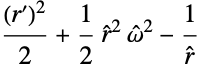

In [1768]:
Energy = (D[OverHat[r][OverHat[t]], OverHat[t]])^2/2 + (OverHat[r][OverHat[t]] OverHat[\[Omega]][OverHat[t]])^2/2 - 1/OverHat[r][OverHat[t]];
Energy // TraditionalForm

### **Момента импульса**
Момент импульса $J$ в системе центра масс:
$$
J = \frac{b^2}{t_0} \hat{r}^2 \hat{\omega} = (G M)^{1/2} b^{3/2} \hat{r}^2 \hat{\omega} = (G M)^{1/2} b^{3/2} \hat{J}
$$

Здесь $\hat{J}$ - безразмерный момент импульса:

In [1770]:
AngularMomentum = (OverHat[r][OverHat[t]])^2 OverHat[\[Omega]][OverHat[t]];
AngularMomentum // TraditionalForm

FormBox[RowBox[{SuperscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>        OverscriptBox["ω", "^"]}], TraditionalForm]

Отсюда $\frac{1}{\hat{r}^{(1)}}\left(\frac{d\hat{E}}{d\hat{t}} - \hat\omega \frac{d\hat{J}}{d\hat{t}}\right)$

FormBox[RowBox[{SuperscriptBox["r", "′′", Rule[MultilineFunction, None]], "-", 

 
>        RowBox[{RowBox[{OverscriptBox["r", "^"]}], " ", 

 
>          SuperscriptBox[OverscriptBox["ω", "^"], "2"]}], "+", 

 
>        FractionBox["1", SuperscriptBox[OverscriptBox["r", "^"], "2"]]}],\
 
>    TraditionalForm]
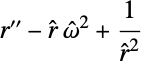

In [1771]:
Simplify[(D[Energy, OverHat[t]] - (AngularMomentum/OverHat[r][OverHat[t]]^2)(D[AngularMomentum, OverHat[t]]))/(D[OverHat[r][OverHat[t]], OverHat[t]])] // TraditionalForm

Что совпадает с **первой** строкой повернутой LHS системы движения

Отсюда $\frac{1}{\hat{r}}\frac{d\hat{J}}{d\hat{t}}$

In [1772]:
Simplify[D[AngularMomentum, OverHat[t]]/OverHat[r][OverHat[t]]] // TraditionalForm

FormBox[RowBox[{RowBox[{"2", " ", OverscriptBox["ω", "^"], " ", 

 
>          SuperscriptBox["r", "′", Rule[MultilineFunction, None]]}], "+", 

 
>        RowBox[{OverscriptBox["r", "^"], " ", 

 
>          SuperscriptBox["ω", "′", Rule[MultilineFunction, None]]}]}],\
 
>    TraditionalForm]

Что совпадает со **второй** строкой повернутой LHS системы движения

Таким образом, мы можем выписать новую **энергетическую** систему уравнений

$$
\begin{align}
\frac{d\hat{E}}{d\hat{t}} &= - \frac{2}{5}\epsilon_G \left(\hat{r}^{(1)} R_{xi}(-\phi) \hat{f}_{ij}^{(5)}\hat{r}_j + \hat{r}\hat\omega R_{yi}(-\phi) \hat{f}_{ij}^{(5)}\hat{r}_j \right)
\\
\frac{d\hat{J}}{d\hat{t}} &= - \frac{2}{5}\epsilon_G \hat{r} R_{yi}(-\phi) \hat{f}_{ij}^{(5)}\hat{r}_j
\end{align}
$$

Или

$$
\left(\frac{d\hat{E}}{d\hat{t}}, \frac{d\hat{J}}{d\hat{t}}\right) = - \frac{2}{5} \epsilon_G T_{nk} R_{ki}(-\phi) \hat{f}_{ij}^{(5)}\hat{r}_j\quad,
$$

Чтобы перейти в размерный вид, достаточно положить $\epsilon_G \equiv 1$.

Здесь
$$
T = 
\begin{bmatrix}
\hat{r}^{(1)} & \hat{r}\hat\omega \\
0 & \hat{r}
\end{bmatrix}
$$
матрица трансформации:

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         GridBox[{{SuperscriptBox["r", "′", Rule[MultilineFunction, None]], 

 
>            RowBox[{OverscriptBox["r", "^"], " ", OverscriptBox["ω", "^"]}]}, 

 
>           {"0", OverscriptBox["r", "^"]}}, Rule[RowSpacings, 1], 

 
>          Rule[ColumnSpacings, 1], Rule[RowAlignments, Baseline], 

 
>          Rule[ColumnAlignments, Center]], "⁠", ")"}], 

 
>       Function[BoxForm`e$, MatrixForm[BoxForm`e$]]], TraditionalForm]
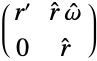

In [1774]:
Transform = {{D[OverHat[r][OverHat[t]], OverHat[t]], OverHat[r][OverHat[t]] OverHat[\[Omega]][OverHat[t]]}, {0, OverHat[r][OverHat[t]]}};
Transform // MatrixForm // TraditionalForm

Итак правая часть энергетической системы запишется как

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         TagBox[GridBox[{{RowBox[{FractionBox["1", "5"], " ", 

 
>               OverscriptBox["r", "^"], " ", SubscriptBox["ϵ", "G"], " ", 

 
>               RowBox[{"(", RowBox[{RowBox[{OverscriptBox["r", "^"], " ", 

 
>                     OverscriptBox["ω", "^"], " ", 

 
>                     RowBox[{"(", RowBox[{RowBox[{RowBox[{"sin", "(", 

 
>                             RowBox[{"2", " ", "ϕ"}], ")"}], " ", 

 
>                           RowBox[{"(", 

 
>                             RowBox[{TemplateBox[List[SubscriptBox[

 
>                            OverscriptBox["f", "^"], 

 
>                            RowBox[List["x", ",", "x"]]], "\"(5)\""], 

 
>                             "Superscript", Rule[SyntaxForm, SuperscriptBox]], 

 
>                             "-", 

 
>                             TemplateBox[List[SubscriptBox[OverscriptB\

 
>   ox["f", "^"], RowBox[List["y", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                             Rule[SyntaxForm, SuperscriptBox]]}], ")"}]}], "-", 

 
>                         RowBox[{"2", " ", 

 
>                           RowBox[{"cos", "(", RowBox[{"2", " ", "ϕ"}], ")"}], 

 
>                           " ", TemplateBox[List[SubscriptBox[OverscriptB\

 
>   ox["f", "^"], RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                            Rule[SyntaxForm, SuperscriptBox]]}]}], ")"}]}], "-", 

 
>                   RowBox[{"2", " ", 

 
>                     SuperscriptBox["r", "′", Rule[MultilineFunction, None]], " ", 

 
>                     RowBox[{"(", RowBox[{RowBox[{RowBox[{"sin", "(", 

 
>                             RowBox[{"2", " ", "ϕ"}], ")"}], " ", 

 
>                           TemplateBox[List[SubscriptBox[OverscriptBox["f", 

 
>                             "^"], RowBox[List["x", ",", "y"]]], "\"(5)\""], 

 
>                            "Superscript", Rule[SyntaxForm, SuperscriptBox]]}], 

 
>                         "+", RowBox[{RowBox[{SuperscriptBox["cos", "2"], "(", 

 
>                             "ϕ", ")"}], " ", 

 
>                           TemplateBox[List[SubscriptBox[OverscriptBox["f", 

 
>                             "^"], RowBox[List["x", ",", "x"]]], "\"(5)\""], 

 
>                            "Superscript", Rule[SyntaxForm, SuperscriptBox]]}], 

 
>                         "+", RowBox[{RowBox[{SuperscriptBox["sin", "2"], "(", 

 
>                             "ϕ", ")"}], " ", 

 
>                           TemplateBox[List[SubscriptBox[OverscriptBox["f", 

 
>                             "^"], RowBox[List["y", ",", "y"]]], "\"(5)\""], 

 
>                            "Superscript", Rule[SyntaxForm, SuperscriptBox]]}]}], 

 
>                       ")"}]}]}], ")"}]}]}, 

 
>            {RowBox[{RowBox[{"-", FractionBox["1", "5"]}], " ", 

 
>               SuperscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>               SubscriptBox["ϵ", "G"], " ", 

 
>               RowBox[{"(", RowBox[{RowBox[{RowBox[{"sin", "(", 

 
>                       RowBox[{"2", " ", "ϕ"}], ")"}], " ", 

 
>                     RowBox[{"(", RowBox[{TemplateBox[List[SubscriptBox[

 
>                            OverscriptBox["f", "^"], 

 
>                            RowBox[List["y", ",", "y"]]], "\"(5)\""], 

 
>                          "Superscript", Rule[SyntaxForm, SuperscriptBox]], "-", 

 
>                         TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                            RowBox[List["x", ",", "x"]]], "\"(5)\""], 

 
>                          "Superscript", Rule[SyntaxForm, SuperscriptBox]]}], ")"}]}\

 
>   ], "+", RowBox[{"2", " ", RowBox[{"cos", "(", RowBox[{"2", " ", "ϕ"}], ")"}], 

 
>                     " ", TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                        RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                      Rule[SyntaxForm, SuperscriptBox]]}]}], ")"}]}]}}, 

 
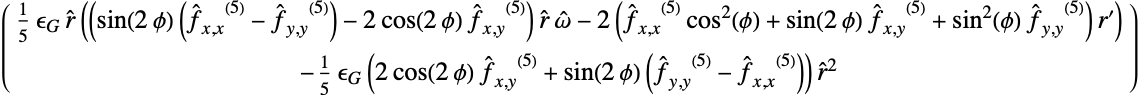

In [1776]:
RHSEnegry = FullSimplify[Transform . RHS, Trig -> True];
RHSEnegry // MatrixForm // TraditionalForm

## Другой Способ получения уравнений движения и энергетических уравнений через лагранжев формализм в полярных координатах

### **Лагранжиан системы**
Лагранжиан $L$ в полярных координатах $(r, \phi)$ выражается как:
$$
L = T - (U + \Phi),
$$
где:
- $T$ — кинетическая энергия,
- $U$ — потенциальная энергия
- $\Phi = \frac{1}{5}f_{ij}^{(5)}r_i r_j = \frac{\epsilon_G}{5}\frac{b^2}{t_0^2}\hat{f}_{ij}^{(5)}\hat{r}_i \hat{r}_j = \epsilon_G\frac{GM}{b}\hat{\Phi}$ - малый потенциал "реакции излучения"

Безразмерный малый потенциал "реакции излучения" $\hat{\Phi} = \frac{1}{5}\hat{f}_{ij}^{(5)}\hat{r}_i\hat{r}_j$

FormBox[RowBox[{FractionBox["1", "5"], " ", 

 
>        RowBox[{"(", RowBox[{RowBox[{OverscriptBox["r", "^"], " ", 

 
>              RowBox[{"cos", "(", "ϕ", ")"}], " ", 

 
>              RowBox[{"(", RowBox[{RowBox[{OverscriptBox["r", "^"], " ", 

 
>                    RowBox[{"sin", "(", "ϕ", ")"}], " ", 

 
>                    TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                       RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                     Rule[SyntaxForm, SuperscriptBox]]}], "+", 

 
>                  RowBox[{OverscriptBox["r", "^"], " ", 

 
>                    RowBox[{"cos", "(", "ϕ", ")"}], " ", 

 
>                    TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                       RowBox[List["x", ",", "x"]]], "\"(5)\""], "Superscript", 

 
>                     Rule[SyntaxForm, SuperscriptBox]]}]}], ")"}]}], "+", 

 
>            RowBox[{OverscriptBox["r", "^"], " ", RowBox[{"sin", "(", "ϕ", ")"}], " ", 

 
>              RowBox[{"(", RowBox[{RowBox[{OverscriptBox["r", "^"], " ", 

 
>                    RowBox[{"cos", "(", "ϕ", ")"}], " ", 

 
>                    TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                       RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                     Rule[SyntaxForm, SuperscriptBox]]}], "+", 

 
>                  RowBox[{OverscriptBox["r", "^"], " ", RowBox[{"sin", "(", "ϕ", ")"}],\
 
>    
                 " ", TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                       RowBox[List["y", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                     Rule[SyntaxForm, SuperscriptBox]]}]}], ")"}]}]}], ")"}]}], 

 
>      TraditionalForm]
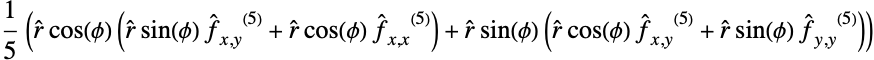

In [1778]:
fh5rhrh = 1/5 EinsteinSummation[{{i, j}, {i}, {j}}, {fh5, rh, rh}];
fh5rhrh // TraditionalForm

Безразмерный лагранжиан

$$
\hat{L} = \hat{T} - (\hat{U} + \epsilon_G\hat{\Phi}),
$$
или
$$
\hat{L} = \frac{1}{2} \left((\hat{r}^{(1)})^2 + \hat{r}^2 \hat{\omega}^2 \right) + \frac{1}{\hat{r}} - \frac{\epsilon_G}{5}\hat{f}_{ij}^{(5)}\hat{r}_i \hat{r}_j.
$$

### **Уравнения Эйлера-Лагранжа**
Уравнения Эйлера-Лагранжа имеют вид:
$$
\frac{d}{dt} \left( \frac{\partial \hat{L}}{\partial \dot{q}_i} \right) - \frac{\partial \hat{L}}{\partial q_i} = 0,
$$
где $q_i$ — обобщённые координаты ($\hat{r}$ и $\phi$).

---

#### Уравнение для координаты $\hat{r}$:
$$
\frac{d}{d\hat{t}} \left(\frac{\partial \hat{L}}{\partial \hat{r}^{(1)}} \right) - \frac{\partial \hat{L}}{\partial \hat{r}} = 0.
$$
Вычислим производные:
$$
\frac{\partial \hat{L}}{\partial \hat{r}^{(1)}} = \hat{r}^{(1)}, \quad \frac{d}{d\hat{t}} \left( \frac{\partial \hat{L}}{\partial \hat{r}^{(1)}} \right) = \hat{r}^{(2)},
$$
$$
\frac{\partial \hat{L}}{\partial \hat{r}} = \hat{r} \hat{\omega}^2 - \frac{1}{\hat{r}^2} - \epsilon_G\frac{\partial \hat{\Phi}}{\partial \hat{r}}.
$$
Подставляем в уравнение Эйлера-Лагранжа:
$$
\hat{r}^{(2)} - \hat{r} \hat{\omega}^2 + \frac{1}{\hat{r}^2} = - \epsilon_G\frac{\partial \hat{\Phi}}{\partial \hat{r}}.
$$

Это **радиальное уравнение движения**.

Здесь 
$$
\frac{\partial \hat{\Phi}}{\partial \hat{r}} = \frac{1}{5}\hat{f}_{ij}^{(5)}\left(\frac{\partial \hat{r}_i}{\partial \hat{r}}\hat{r}_j + \hat{r}_i\frac{\partial \hat{r}_j}{\partial \hat{r}}\right)
$$
<span style="color:red">**TODO:**</span> Обсудить почему $\hat{f}_{ij}^{(5)}$ берётся заданной функцией, не зависящей от $\hat{r}$ при вариации лагранжиана.

Правая часть радиального уравнения движения будет выглядеть как

FormBox[RowBox[{RowBox[{"-", FractionBox["2", "5"]}], " ", OverscriptBox["r", "^"], 

 
>        " ", SubscriptBox["ϵ", "G"], " ", 

 
>        RowBox[{"(", RowBox[{RowBox[{RowBox[{"sin", "(", RowBox[{"2", " ", "ϕ"}], 

 
>                ")"}], " ", TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                 RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>               Rule[SyntaxForm, SuperscriptBox]]}], "+", 

 
>            RowBox[{RowBox[{SuperscriptBox["cos", "2"], "(", "ϕ", ")"}], " ", 

 
>              TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                 RowBox[List["x", ",", "x"]]], "\"(5)\""], "Superscript", 

 
>               Rule[SyntaxForm, SuperscriptBox]]}], "+", 

 
>            RowBox[{RowBox[{SuperscriptBox["sin", "2"], "(", "ϕ", ")"}], " ", 

 
>              TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                 RowBox[List["y", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>               Rule[SyntaxForm, SuperscriptBox]]}]}], ")"}]}], TraditionalForm]
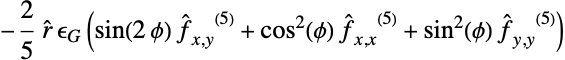

In [1780]:
RHSMotionRadialLagrange = - 1/5 Subscript[\[Epsilon], G] FullSimplify[EinsteinSummation[{{i, j}, {i}, {j}}, {fh5, D[rh, OverHat[r][OverHat[t]]], rh}] + EinsteinSummation[{{i, j}, {i}, {j}}, {fh5, rh, D[rh, OverHat[r][OverHat[t]]]}]];
RHSMotionRadialLagrange // TraditionalForm

<span style="color:red">**NB:**</span> Выражение <span style="color:green">**совпадает**</span> с раннее полученным уравнением и с уравнением (10) из файла Binary.pdf

In [1587]:
RHSMotion[[1]] - RHSMotionRadialLagrange

0

---

#### Уравнение для координаты $\phi$:
$$
\frac{d}{d\hat{t}} \left(\frac{\partial \hat{L}}{\partial \hat{\omega}} \right) - \frac{\partial \hat{L}}{\partial \phi} = 0.
$$
Вычислим производные:
$$
\frac{\partial \hat{L}}{\partial \hat{\omega}} = \hat{r}^2 \hat{\omega}, \quad \frac{d}{d\hat{t}} \left( \frac{\partial \hat{L}}{\partial \hat{\omega}} \right) = \frac{d}{d\hat{t}} \left( \hat{r}^2 \hat{\omega} \right),
$$
$$
\frac{\partial \hat{L}}{\partial \phi} = - \epsilon_G\frac{\partial \hat{\Phi}}{\partial \phi}.
$$
Подставляем в уравнение Эйлера-Лагранжа:
$$
\frac{1}{\hat{r}}\frac{d}{d\hat{t}} \left( \hat{r}^2 \hat{\omega} \right) = \frac{1}{\hat{r}}\frac{d\hat{J}}{d\hat{t}} = - \frac{\epsilon_G}{\hat{r}}\frac{\partial \hat{\Phi}}{\partial \phi}.
$$

Здесь 
$$
\frac{\partial \hat{\Phi}}{\partial \phi} = \frac{1}{5}\hat{f}_{ij}^{(5)}\left(\frac{\partial \hat{r}_i}{\partial \phi}\hat{r}_j + \hat{r}_i\frac{\partial \hat{r}_j}{\partial \phi}\right)
$$
<span style="color:red">**TODO:**</span> Обсудить почему $\hat{f}_{ij}^{(5)}$ берётся заданной функцией, не зависящей от $\phi$ при вариации лагранжиана.

Правая часть уравнения движения для $\phi$ будет выглядеть как

FormBox[RowBox[{RowBox[{"-", FractionBox["1", "5"]}], " ", OverscriptBox["r", "^"], 

 
>        " ", SubscriptBox["ϵ", "G"], " ", 

 
>        RowBox[{"(", RowBox[{RowBox[{RowBox[{"sin", "(", RowBox[{"2", " ", "ϕ"}], 

 
>                ")"}], " ", RowBox[{"(", 

 
>                RowBox[{TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                     RowBox[List["y", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>                   Rule[SyntaxForm, SuperscriptBox]], "-", 

 
>                  TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                     RowBox[List["x", ",", "x"]]], "\"(5)\""], "Superscript", 

 
>                   Rule[SyntaxForm, SuperscriptBox]]}], ")"}]}], "+", 

 
>            RowBox[{"2", " ", RowBox[{"cos", "(", RowBox[{"2", " ", "ϕ"}], ")"}], " ", 

 
>              TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                 RowBox[List["x", ",", "y"]]], "\"(5)\""], "Superscript", 

 
>               Rule[SyntaxForm, SuperscriptBox]]}]}], ")"}]}], TraditionalForm]
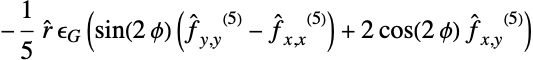

In [1782]:
RHSMotionPhiLagrange = - 1/5 Subscript[\[Epsilon], G] FullSimplify[EinsteinSummation[{{i, j}, {i}, {j}}, {fh5, D[rh, \[Phi][OverHat[t]]], rh}] + EinsteinSummation[{{i, j}, {i}, {j}}, {fh5, rh, D[rh, \[Phi][OverHat[t]]]}]]/OverHat[r][OverHat[t]];
RHSMotionPhiLagrange // TraditionalForm

<span style="color:red">**NB:**</span> Выражение <span style="color:green">**совпадает**</span> с раннее полученным уравнением и с уравнением (9) из файла Binary.pdf

In [1597]:
RHSMotion[[2]] - RHSMotionPhiLagrange

0

## Получим **энергетическую** систему уравнений в подходе Лагранжа

Заметим, что энергия системы:
$$
\hat{E} = \frac{(\hat{r}^{(1)})^2}{2} + \frac{\hat{r}^2 \hat{\omega}^2}{2} - \frac{1}{\hat{r}}
$$
$$
\frac{1}{\hat{r}^{(1)}}\left(\frac{d\hat{E}}{d\hat{t}} - \hat{\omega} \frac{d\hat{J}}{d\hat{t}}\right) = \hat{r}^{(2)} - \hat{r} \hat{\omega}^2 + \frac{1}{\hat{r}^2}
$$

А также уравнение для изменения момента импульса системы есть
$$
\frac{d\hat{J}}{d\hat{t}} = - \epsilon_G\frac{\partial \hat{\Phi}}{\partial \phi}.
$$

Итоговая энергетическая система, выведенная по-новому будет записываться как:

$$
\begin{align}
\frac{d\hat{E}}{d\hat{t}} &= - \epsilon_G\left(\hat{r}^{(1)}\frac{\partial \hat{\Phi}}{\partial \hat{r}} + \hat{\omega} \frac{\partial \hat{\Phi}}{\partial \phi}\right) = - \epsilon_G \frac{d\hat{\Phi}}{d\hat{t}}
  = - \frac{\epsilon_G}{5}\hat{f}_{ij}^{(5)}\left(\frac{d\hat{r}_i}{d\hat{t}}\hat{r}_j + \hat{r}_i\frac{d\hat{r}_j}{d\hat{t}}\right)
\\
\frac{d\hat{J}}{d\hat{t}} &= - \epsilon_G\frac{\partial \hat{\Phi}}{\partial \phi} = - \frac{\epsilon_G}{5}\hat{f}_{ij}^{(5)}\left(\frac{\partial \hat{r}_i}{\partial \phi}\hat{r}_j + \hat{r}_i\frac{\partial \hat{r}_j}{\partial \phi}\right)
\end{align}
$$

И снова, чтобы перейти в размерный вид, достаточно положить $\epsilon_G \equiv 1$

То есть
$$
\begin{align}
\frac{dE}{dt} &= - \frac{d\Phi}{dt}
\\
\frac{dJ}{dt} &= - \frac{\partial \Phi}{\partial \phi}

\end{align}
$$
<span style="color:red">**TODO:**</span> Обсудить почему $\hat{f}_{ij}^{(5)}$ берётся заданной функцией, не зависящей от $\hat{r}, \phi, \hat{t}$ при вариации лагранжиана.

FormBox[TagBox[RowBox[{"(", "⁠", 

 
>         TagBox[GridBox[{{RowBox[{RowBox[{"-", FractionBox["2", "5"]}], " ", 

 
>               OverscriptBox["r", "^"], " ", SubscriptBox["ϵ", "G"], " ", 

 
>               RowBox[{"(", RowBox[{RowBox[{SuperscriptBox["r", "′", 

 
>                      Rule[MultilineFunction, None]], " ", 

 
>                     RowBox[{"(", RowBox[{RowBox[{RowBox[{"sin", "(", 

 
>                             RowBox[{"2", " ", "ϕ"}], ")"}], " ", 

 
>                           TemplateBox[List[SubscriptBox[OverscriptBox["f", 

 
>                             "^"], RowBox[List["x", ",", "y"]]], "\"(5)\""], 

 
>                            "Superscript", Rule[SyntaxForm, SuperscriptBox]]}], 

 
>                         "+", RowBox[{RowBox[{SuperscriptBox["cos", "2"], "(", 

 
>                             "ϕ", ")"}], " ", 

 
>                           TemplateBox[List[SubscriptBox[OverscriptBox["f", 

 
>                             "^"], RowBox[List["x", ",", "x"]]], "\"(5)\""], 

 
>                            "Superscript", Rule[SyntaxForm, SuperscriptBox]]}], 

 
>                         "+", RowBox[{RowBox[{SuperscriptBox["sin", "2"], "(", 

 
>                             "ϕ", ")"}], " ", 

 
>                           TemplateBox[List[SubscriptBox[OverscriptBox["f", 

 
>                             "^"], RowBox[List["y", ",", "y"]]], "\"(5)\""], 

 
>                            "Superscript", Rule[SyntaxForm, SuperscriptBox]]}]}], 

 
>                       ")"}]}], "+", 

 
>                   RowBox[{OverscriptBox["r", "^"], " ", OverscriptBox["ω", "^"], 

 
>                     " ", RowBox[{"(", 

 
>                       RowBox[{RowBox[{RowBox[{"cos", "(", 

 
>                             RowBox[{"2", " ", "ϕ"}], ")"}], " ", 

 
>                           TemplateBox[List[SubscriptBox[OverscriptBox["f", 

 
>                             "^"], RowBox[List["x", ",", "y"]]], "\"(5)\""], 

 
>                            "Superscript", Rule[SyntaxForm, SuperscriptBox]]}], 

 
>                         "+", RowBox[{RowBox[{"sin", "(", "ϕ", ")"}], " ", 

 
>                           RowBox[{"cos", "(", "ϕ", ")"}], " ", 

 
>                           RowBox[{"(", 

 
>                             RowBox[{TemplateBox[List[SubscriptBox[

 
>                             OverscriptBox["f", "^"], 

 
>                             RowBox[List["y", ",", "y"]]], "\"(5)\""], 

 
>                              "Superscript", Rule[SyntaxForm, SuperscriptBox]], 

 
>                              "-", 

 
>                              TemplateBox[List[SubscriptBox[OverscriptBox["f", 

 
>                             "^"], RowBox[List["x", ",", "x"]]], "\"(5)\""], 

 
>                              "Superscript", Rule[SyntaxForm, SuperscriptBox]]}], 

 
>                             ")"}]}]}], ")"}]}]}], ")"}]}]}, 

 
>            {RowBox[{RowBox[{"-", FractionBox["1", "5"]}], " ", 

 
>               SuperscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>               SubscriptBox["ϵ", "G"], " ", 

 
>               RowBox[{"(", RowBox[{RowBox[{RowBox[{"sin", "(", 

 
>                       RowBox[{"2", " ", "ϕ"}], ")"}], " ", 

 
>                     RowBox[{"(", RowBox[{TemplateBox[List[SubscriptBox[

 
>                            OverscriptBox["f", "^"], 

 
>                            RowBox[List["y", ",", "y"]]], "\"(5)\""], 

 
>                          "Superscript", Rule[SyntaxForm, SuperscriptBox]], "-", 

 
>                         TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                            RowBox[List["x", ",", "x"]]], "\"(5)\""], 

 
>                          "Superscript", Rule[SyntaxForm, SuperscriptBox]]}], ")"}]}\

 
>   ], "+", RowBox[{"2", " ", RowBox[{"cos", "(", RowBox[{"2", " ", "ϕ"}], ")"}], 

 
>                     " ", TemplateBox[List[SubscriptBox[OverscriptBox["f", "^"], 

 
>                        RowBox[List["x", ",", "y"]]], "\
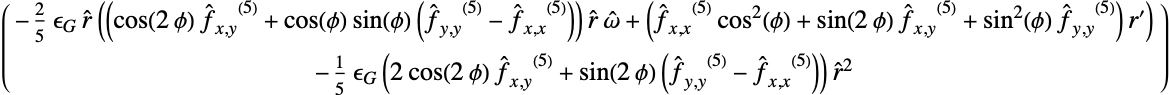

In [1784]:
RHSEnegryLagrange = - Subscript[\[Epsilon],G] FullSimplify[{
  D[fh5rhrh, OverHat[t]] /. OmegaReplace,
  D[fh5rhrh, \[Phi][OverHat[t]]]
}, Trig -> True];

RHSEnegryLagrange // MatrixForm // TraditionalForm

<span style="color:red">**NB:**</span> Выражения полностью <span style="color:green">**совпадают**</span> с предыдущим подходом!

0

0
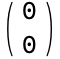

In [1603]:
FullSimplify[RHSEnegryLagrange - RHSEnegry] // MatrixForm

$$
I_1 = \hat{r}_2 \left[ 120\hat{r}_2^{(1)}\omega^2\omega^{(1)} - 5\hat{r}_2^{(1)}\omega^{(3)} - 16\hat{r}_2\omega^5 - 10\hat{r}_2^{(2)}\omega^{(2)} + 60\hat{r}_2\omega(\omega^{(1)})^2
- 10\hat{r}_2^{(3)}\omega^{(1)} + 40\hat{r}_2^{(2)}\omega^3 - 5\hat{r}_2^{(4)}\omega - \hat{r}_2\omega^{(4)} + 40\hat{r}_2\omega^2\omega^{(2)} \right]
$$

FormBox[RowBox[{SubscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>        RowBox[{"(", RowBox[{RowBox[{"-", 

 
>              RowBox[{SubscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>                SuperscriptBox["ω", TagBox[RowBox[{"(", "4", ")"}], Derivative], 

 
>                 Rule[MultilineFunction, None]]}]}], "-", 

 
>            RowBox[{"5", " ", SuperscriptBox["ω", 

 
>               TagBox[RowBox[{"(", "3", ")"}], Derivative], 

 
>               Rule[MultilineFunction, None]], " ", 

 
>              SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], "2"], "′"]}], "+", 

 
>            RowBox[{"40", " ", SubscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>              SuperscriptBox[OverscriptBox["ω", "^"], "2"], " ", 

 
>              SuperscriptBox["ω", "′′", Rule[MultilineFunction, None]]}], "-", 

 
>            RowBox[{"10", " ", SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], 

 
>                "2"], "′′"], " ", SuperscriptBox["ω", "′′", 

 
>               Rule[MultilineFunction, None]]}], "-", 

 
>            RowBox[{"10", " ", SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], 

 
>                "2"], "′′′"], " ", SuperscriptBox["ω", "′", 

 
>               Rule[MultilineFunction, None]]}], "+", 

 
>            RowBox[{"120", " ", SuperscriptBox[OverscriptBox["ω", "^"], "2"], " ", 

 
>              SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], "2"], "′"], " ", 

 
>              SuperscriptBox["ω", "′", Rule[MultilineFunction, None]]}], "+", 

 
>            RowBox[{"60", " ", SubscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>              OverscriptBox["ω", "^"], " ", 
           SuperscriptBox[RowBox[{"(", 

 
>                 SuperscriptBox["ω", "′", Rule[MultilineFunction, None]], ")"}],\
 
>    "2"]}], 
         "+", RowBox[{"40", " ", SuperscriptBox[OverscriptBox["ω", "^"],\
 
>    "3"], " ", 
           SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], "2"],\
 
>    "′′"]}], "-", 
         RowBox[{"5", " ", OverscriptBox["ω", "^"], " ", 

 
>              SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], "2"], "′′′′"]}],\
 
>    "-", 
         RowBox[{RowBox[{"16"}], " ", SubscriptBox[OverscriptBox["r", "^"],\
 
>    "2"], 
           " ", SuperscriptBox[OverscriptBox["ω", "^"], "5"]}]}], ")"}]}], 

 
>      TraditionalForm]
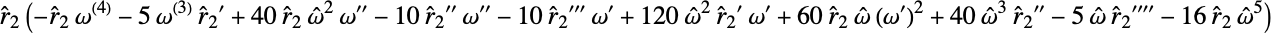

In [1786]:
I1 = Subscript[OverHat[r], 2][OverHat[t]] * (
    120 * Derivative[1][Subscript[OverHat[r], 2]][OverHat[t]] *
    OverHat[\[Omega]][OverHat[t]]^2 * Derivative[1][OverHat[\[Omega]]][OverHat[t]]
    - 5 * Derivative[1][Subscript[OverHat[r], 2]][OverHat[t]] *
    Derivative[3][OverHat[\[Omega]]][OverHat[t]]
    - 16 * Subscript[OverHat[r], 2][OverHat[t]] *
    OverHat[\[Omega]][OverHat[t]]^5
    - 10 * Derivative[2][Subscript[OverHat[r], 2]][OverHat[t]] *
    Derivative[2][OverHat[\[Omega]]][OverHat[t]]
    + 60 * Subscript[OverHat[r], 2][OverHat[t]] *
    OverHat[\[Omega]][OverHat[t]] * Derivative[1][OverHat[\[Omega]]][OverHat[t]]^2
    - 10 * Derivative[3][Subscript[OverHat[r], 2]][OverHat[t]] *
    Derivative[1][OverHat[\[Omega]]][OverHat[t]]
    + 40 * Derivative[2][Subscript[OverHat[r], 2]][OverHat[t]] *
    OverHat[\[Omega]][OverHat[t]]^3
    - 5 * Derivative[4][Subscript[OverHat[r], 2]][OverHat[t]] *
    OverHat[\[Omega]][OverHat[t]]
    - Subscript[OverHat[r], 2][OverHat[t]] *
    Derivative[4][OverHat[\[Omega]]][OverHat[t]]
    + 40 * Subscript[OverHat[r], 2][OverHat[t]] *
    OverHat[\[Omega]][OverHat[t]]^2 * Derivative[2][OverHat[\[Omega]]][OverHat[t]]
);
I1 // TraditionalForm

FormBox[RowBox[{SubscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>        RowBox[{"(", RowBox[{RowBox[{"-", 

 
>              RowBox[{SubscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>                SuperscriptBox["ω", TagBox[RowBox[{"(", "4", ")"}], Derivative], 

 
>                 Rule[MultilineFunction, None]]}]}], "-", 

 
>            RowBox[{"5", " ", SuperscriptBox["ω", 

 
>               TagBox[RowBox[{"(", "3", ")"}], Derivative], 

 
>               Rule[MultilineFunction, None]], " ", 

 
>              SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], "2"], "′"]}], "+", 

 
>            RowBox[{"40", " ", SubscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>              SuperscriptBox[OverscriptBox["ω", "^"], "2"], " ", 

 
>              SuperscriptBox["ω", "′′", Rule[MultilineFunction, None]]}], "-", 

 
>            RowBox[{"10", " ", SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], 

 
>                "2"], "′′"], " ", SuperscriptBox["ω", "′′", 

 
>               Rule[MultilineFunction, None]]}], "-", 

 
>            RowBox[{"10", " ", SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], 

 
>                "2"], "′′′"], " ", SuperscriptBox["ω", "′", 

 
>               Rule[MultilineFunction, None]]}], "+", 

 
>            RowBox[{"120", " ", SuperscriptBox[OverscriptBox["ω", "^"], "2"], " ", 

 
>              SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], "2"], "′"], " ", 

 
>              SuperscriptBox["ω", "′", Rule[MultilineFunction, None]]}], "+", 

 
>            RowBox[{"60", " ", SubscriptBox[OverscriptBox["r", "^"], "2"], " ", 

 
>              OverscriptBox["ω", "^"], " ", 
           SuperscriptBox[RowBox[{"(", 

 
>                 SuperscriptBox["ω", "′", Rule[MultilineFunction, None]], ")"}],\
 
>    "2"]}], 
         "+", RowBox[{"40", " ", SuperscriptBox[OverscriptBox["ω", "^"],\
 
>    "3"], " ", 
           SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], "2"],\
 
>    "′′"]}], "-", 
         RowBox[{"5", " ", OverscriptBox["ω", "^"], " ", 

 
>              SuperscriptBox[SubscriptBox[OverscriptBox["r", "^"], "2"], "′′′′"]}],\
 
>    "-", 
         RowBox[{RowBox[{"16"}], " ", SubscriptBox[OverscriptBox["r", "^"],\
 
>    "2"], 
           " ", SuperscriptBox[OverscriptBox["ω", "^"], "5"]}]}], ")"}]}], 

 
>      TraditionalForm]
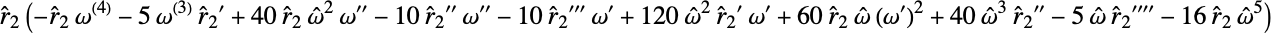

In [1802]:
fh1 = fh /. OverHat[r][OverHat[t]] -> Sqrt[Subscript[OverHat[r],2][OverHat[t]]];
fh51 = Simplify[D[fh1, {OverHat[t], 5}], Trig -> True];
I1a = Subscript[OverHat[r],2][OverHat[t]]*Expand[Simplify[1/2(Sin[2\[Phi][OverHat[t]]] (fh51[[1,1]] - fh51[[2,2]]) - 2 Cos[2\[Phi][OverHat[t]]] fh51[[1,2]]) /. OmegaReplace, Trig -> True]];
I1a // TraditionalForm

In [1794]:
I1a - I1

0

^ ^ 5 ^  ^ 2      ^ ^  ^  ^ 2  ^   ^ 2      ^ ^ 2 ^  ^   ^   ^   ^    ^
16 ω[t]  r [t]  + 12 ω[t] r [t]  (ω)'[t]  + 24 ω[t]  r [t] (ω)'[t] (r )'[t] + 
          2                2                          2              2
 
       ^ ^ 3  ^    ^ 2     ^ ^ 2 ^  ^ 2  ^    ^       ^ ^ 3 ^  ^   ^     ^
>   24 ω[t]  (r )'[t]  - 4 ω[t]  r [t]  (ω)''[t] - 16 ω[t]  r [t] (r )''[t] + 
               2                  2                          2      2
 
       ^   ^   ^    ^   ^     ^    ^  ^   ^    ^   ^     ^      ^ ^   ^     ^ 2
>   3 (ω)'[t] (r )'[t] (r )''[t] + r [t] (ω)''[t] (r )''[t] + 3 ω[t] (r )''[t]  - 
                2        2          2               2                  2
 
    ^  ^   ^   ^   ^  (3) ^      ^ ^   ^    ^   ^  (3) ^
>   r [t] (ω)'[t] (r )   [t] - 2 ω[t] (r )'[t] (r )   [t]
     2              2                   2        2
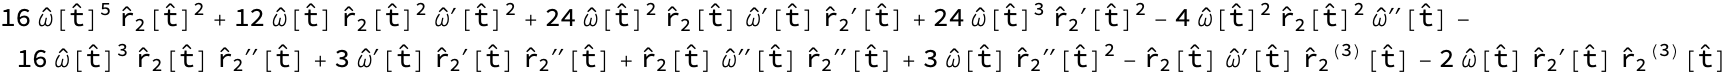

In [1338]:
fh2 = Array[If[#1 <= #2,
                    Superscript[Subscript[OverHat[f], {x, y}[[#1]], {x, y}[[#2]]], "(2)"],
                    Superscript[Subscript[OverHat[f], {x, y}[[#2]], {x, y}[[#1]]], "(2)"]] &, {2, 2}];
fh2 // MatrixForm;
fh3 = Array[If[#1 <= #2,
                    Superscript[Subscript[OverHat[f], {x, y}[[#1]], {x, y}[[#2]]], "(3)"],
                    Superscript[Subscript[OverHat[f], {x, y}[[#2]], {x, y}[[#1]]], "(3)"]] &, {2, 2}];
fh3 // MatrixForm;

fh2 = Simplify[D[fh1, {OverHat[t], 2}], Trig -> True];
fh3 = Simplify[D[fh1, {OverHat[t], 3}], Trig -> True];

Expand[Simplify[EinsteinSummation[{{i, j}, {i, l}, {l, j}}, {LeviCivitaTensor[2], fh2, fh3}] /. OmegaReplace, Trig -> True]]

# Интегрирование по частям
[Integrate By Parts](https://resources.wolframcloud.com/FunctionRepository/resources/IntegrateByParts/)
Contributed by: Wolfram|Alpha Math Team

In [ ]:
IntegrateByParts // ClearAll;
IntegrateByParts[ args___ ] :=
    Module[ { res },
        update[ ];
        res = Symbol[ "ResourceFunctionHelpers`IntegrateByParts" ][ args ];
        res /; Head @ res =!= Symbol[ "ResourceFunctionHelpers`IntegrateByParts" ]
    ];

In [ ]:
update // ClearAll;
update[ ] /; $VersionNumber <= 12 :=
    Once[

        If[ MemberQ[ PacletSites[ ], $publicPacletSite ],
            PacletManager`PacletUpdate[
                "ResourceFunctionHelpers",
                "Site"        -> "http://pacletserver.wolfram.com",
                "UpdateSites" -> True
            ]
        ];

        Quiet @ Block[ { $ContextPath }, Get[ "ResourceFunctionHelpers`" ] ]
    ];

In [ ]:
update // ClearAll;
update[ ] /; $VersionNumber <= 12 :=
    Once[

        If[ MemberQ[ PacletSites[ ], $publicPacletSite ],
            PacletManager`PacletUpdate[
                "ResourceFunctionHelpers",
                "Site"        -> "http://pacletserver.wolfram.com",
                "UpdateSites" -> True
            ]
        ];

        Quiet @ Block[ { $ContextPath }, Get[ "ResourceFunctionHelpers`" ] ]
    ];

$$
  I_4(u) = \int_{r_1}^\infty \frac{24r^2u^6 + 48u^6r + 120r^{3/2}u^4 - 96u^6 + 96u^4\sqrt{r} - u^2r^2 + 133u^2r - 2r^{3/2}}{r^4\sqrt{u^2r + 2\sqrt{r} - u^2}} \, dr,
$$
где при $r \ge r_1$ выражение $u^2r + 2\sqrt{r} - u^2 \ge 0$.

Всюду предполагается $u \gt 0$.

## Интегрант $f_4(u, r)$:

$$
  f_4(u, r) = \frac{24r^2u^6 + 48u^6r + 120r^{3/2}u^4 - 96u^6 + 96u^4\sqrt{r} - u^2r^2 + 133u^2r - 2r^{3/2}}{r^4\sqrt{u^2r + 2\sqrt{r} - u^2}}
$$

In [ ]:
integrand4[u_, r_] = (24*r^2*u^6 + 48*u^6*r + 120*r^(3/2)*u^4 - 96*u^6 + 96*u^4*Sqrt[r] - u^2*r^2 + 133*u^2*r - 2*r^(3/2)) /
  (r^4*Sqrt[u^2*r + 2*Sqrt[r] - u^2]);

Значение интегранта при любом $u$ на бесконечно больших $r$ равно 0:

In [ ]:
Limit[integrand4[u, r], r -> Infinity]

### Выражение для левой границы $r_1$

In [ ]:
eqr1[u_, r_] = u^2*r + 2*Sqrt[r] - u^2;
sol = Assuming[{u ∈ Reals, r ∈ Reals, r > 0}, Solve[eqr1[u, r] == 0, r]];
r1[u_] = Simplify[r/.sol[[1]]]

$r_1$ обращается в 0 при $u \rightarrow 0$:

In [ ]:
Series[r1[u], {u, 0, 5}]
Limit[r1[u], u -> 0]

И проверим, что знаменатель обращается в 0 при $r = r_1$

In [ ]:
PlotR1[u_] := Module[
  {points, r1Value},

  r1Value = Piecewise[{{0, u == 0}}, r1[u]];
  points = {{r1Value, eqr1[u, r1Value]}};

  plotLabel = "u = " <> ToString[u];

  Show[
    Plot[
      eqr1[u, r],
      {r, -1, 10},
      AxesLabel -> {"u", "r1"},
      PlotLabel -> plotLabel,
      PlotRange -> All
    ],
    ListPlot[
      points,
      PlotStyle -> {Red, PointSize[Large]}
    ]
  ]
]

plots = {PlotR1[3], PlotR1[0.1], PlotR1[0.0]};
GraphicsRow[plots]

### Графики функций интегранта $f_4(u_i, r)$:

In [ ]:
PlotIntegrand4[u_] := Module[
  {r1Value},

  r1Value = Piecewise[{{0, u == 0}}, r1[u]];

  plotLabel = "u = " <> ToString[u];

  Plot[
    integrand4[u, r],
    {r, r1Value, 10^3},
    PlotLabel -> plotLabel,
    PlotRange -> All,
    AxesOrigin -> {0, 0},
    AxesLabel -> {"r", "integrand4"},
    ScalingFunctions -> {"Log", "SignedLog"}
  ]
]

plots = {PlotIntegrand4[0.0], PlotIntegrand4[0.03], PlotIntegrand4[0.3]};
GraphicsRow[plots]

*Mathematica* очень долго берёт этот интеграл, но выдаёт огромную простыню выражений, которую не может упростить, используя при это коплексную экспоненту.

In [ ]:
Inactivate[Integrate[integrand4[u, r], {r, r1[u], Infinity}, Assumptions -> {u ∈ Reals, u > 0}]]

## Численный график $I_4(u)$ с использованием NIntegrate:

In [ ]:
Plot[
  NIntegrate[integrand4[u, r], {r, r1[u], Infinity}],
  {u, 1, 100},
  PlotLabel -> "NIntegral of integrand4",
  AxesLabel -> {"u", "integrand4"}
]

## Численный график $I_4(u)$ с использованием Integrate:

In [ ]:
(* points = With[
  {u := 10^up},
  Table[
    {u, N[Integrate[integrand4[u, r], {r, r1[u], Infinity}]]},
    {up, 0, 2, 0.05}
  ]
]; *)

points = Table[
  {u, N[Integrate[integrand4[u, r], {r, r1[u], Infinity}]]},
  {u, 1, 100, 1}
];

ListPlot[
  points,
  Joined -> True,
  PlotRange -> All,
  PlotLabel -> "Integral of integrand4",
  AxesLabel -> {"u", "integral4"}
]

## Первообразная $\tilde{I}_4(u, r)$:

In [ ]:
antiderivative4[u_, r_] = Integrate[integrand4[u, r], r]

Явно определим аргумент комплексного числа:

In [ ]:
(* complexLog[z_] := Log[Abs[z]] + I Arg[z]; *)
arg[z_] := ArcTan[ComplexExpand[Im[z]]/ComplexExpand[Re[z]]];
(* abs[z_] := ComplexExpand[Abs[z]]; *)

Применяя его к antiderivative4[u, r], мы получаем действительное выражение, состоящее из двух слагаемых одно без $\tan^{-1}$, а второе, включающее $\tan^{-1}$:

In [ ]:
antiderivative4s[u_, r_] =
  Simplify[
    ComplexExpand[
      Re[antiderivative4[u, r]]
    ] /. Arg -> arg,
    {{u, r} ∈ Reals, u > 0, r > r1[u]}
  ];

antiderivative4s[u_, r_] =
  Sqrt[2 Sqrt[r] - u^2 + r u^2] * Simplify[
    Expand[
      (antiderivative4s[u, r] /. ArcTan[x_] -> 0) /
      Sqrt[2 Sqrt[r] - u^2 + r u^2]
    ],
    {{u, r} ∈ Reals, u > 0, r > 0}
  ] -
  Cases[antiderivative4s[u, r],
    coeff_.*ArcTan[arg_] :> coeff*ArcTan[arg], ∞][[2]] /
  (12 * r^3 * u^7)

### График первообразной $\tilde{I}_4(u_i, r)$:

In [ ]:
rules = {
  eqr1[u, r] -> 0,
  ArcTan[x_] -> -Pi/2
};

PlotAntiderivative[u_] := Module[
  {points, antiderivative, r1Value},

  r1Value = r1[u]*(1.0+10^-12);
  antiderivative =
    If[r == r1Value,
      antiderivative4s[u, r] /. rules,
      antiderivative4s[u, r]
    ];

  points = {{r1Value, Re[antiderivative /. r -> r1Value]}};

  plotLabel = "u = " <> ToString[u];

  Show[
    Plot[
      antiderivative,
      {r, r1Value, r1Value*2.1},
      PlotLabel -> plotLabel,
      PlotRange -> All,
      AxesLabel -> {"r", "antiderivative4s"},
      ScalingFunctions -> {"SignedLog", "SignedLog"}
    ],
    ListPlot[
      points,
      PlotRange -> All,
      PlotStyle -> {Red, PointSize[Large]},
      ScalingFunctions -> {"SignedLog", "SignedLog"}
    ]
  ]
]

plots = {PlotAntiderivative[3], PlotAntiderivative[0.1], PlotAntiderivative[5*10.0^-2]};
GraphicsRow[plots]

## Определённый интеграл, возьмём как разницу первообразных по теореме Ньютона-Лейбница,
$$
  I_{4,1}(u) = \int_{r_1}^{\infty} f_4(u, r) \, dr = \tilde{I}_{4}(u, \infty) - \tilde{I}_{4}(u, r_1(u)):
$$

Найдём $\tilde{I}_{4}(u, \infty)$:

In [ ]:
integral4Inf[u_] = Limit[
  antiderivative4s[u, r],
  r -> Infinity,
  Assumptions -> {u ∈ Reals, u > 0}
];

integral4Infs[u_] = Simplify[
  ComplexExpand[
    Re[integral4Inf[u]]
  ] /. Arg -> arg,
  {{u, r} ∈ Reals, u > 0, r > r1[u]}
]

Найдём $\tilde{I}_{4}(r_1(u))$, при этом заметим, что $2\sqrt{r} - u^2 + r u^2 = 0$, и $\mathrm{arctan}(-\infty) = -\frac{\pi}{2}$:

In [ ]:
integral4r1[u_] = antiderivative4s[u, r] /. rules

### Графики функций $\tilde{I}_{4}(u, r_i)$:

In [ ]:
Plot[
  {
    N[antiderivative4s[u, 1]],
    N[antiderivative4s[u, 10^2]],
    N[antiderivative4s[u, 10^5]],
    N[antiderivative4s[u, 10^10]],
    N[integral4Infs[u]]
  },
  {u, 0, 1000},
  AxesLabel -> {"u", "antiderivative4"},
  PlotLegends -> {
    "antiderivative4s[r=1]",
    "antiderivative4s[r=10^2]",
    "antiderivative4s[r=10^5]",
    "antiderivative4s[r=10^10]",
    "antiderivative4s[r=Infinity]"
  },
  ScalingFunctions -> {"SignedLog", "SignedLog"}
]

In [ ]:
Plot[
  {
    N[Re[antiderivative4s[u, r1[u]+10^-2]]],
    N[Re[antiderivative4s[u, r1[u]+10^-4]]],
    N[Re[antiderivative4s[u, r1[u]+10^-5]]],
    N[Re[antiderivative4s[u, r1[u]+1.35*10^-6]]],
    N[Re[antiderivative4s[u, r1[u]+10^-7]]],
    N[Re[antiderivative4s[u, r1[u]+10^-10]]],
    N[Re[antiderivative4s[u, r1[u]+10^-12]]],
    N[integral4r1[u]]
  },
  {u, 0.0, 100},
  AxesLabel -> {"u", "antiderivative4"},
  PlotLegends -> {
    "antiderivative4s[r=r1[u]+10^{-2}]",
    "antiderivative4s[r=r1[u]+10^{-4}]",
    "antiderivative4s[r=r1[u]+10^{-5}]",
    "antiderivative4s[r=r1[u]+1.35*10^-6]",
    "antiderivative4s[r=r1[u]+10^{-7}]",
    "antiderivative4s[r=r1[u]+10^{-10}]",
    "antiderivative4s[r=r1[u]+10^{-12}]",
    "antiderivative4s[r=r1[u]]"
    },
  PlotRange -> All,
  ScalingFunctions -> {"Log", "SignedLog"}
]

## Итоговый ответ для $I_4(u)$:

In [ ]:
I4[u_] = Simplify[Collect[Simplify[integral4Infs[u] - integral4r1[u], {u ∈ Reals, u > 0}], (425 + 366*u^4 + 37*u^8)]]

In [ ]:
TeXForm[I4[u]]

## Сравнение Integrate и аналитической $I_4(u)$

In [ ]:
Show[
  Plot[
    N[I4[u]],
    {u, 0, 100},
    PlotLabel -> Subscript["I", 4][u],
    AxesLabel -> {"u", Subscript["I", 4]},
    PlotLegends -> {Subscript["I", 4][u]},
    ScalingFunctions -> {"SignedLog", "SignedLog"}
  ],
  ListPlot[
    points,
    (* Joined -> True, *)
    Mesh -> All,
    PlotStyle -> {Red, Dashed},
    PlotLegends -> {Subscript["Integrate I", 4][u]},
    ScalingFunctions -> {"SignedLog", "SignedLog"}
  ]
]

In [ ]:
points01 = Table[{u, N[Integrate[integrand4[u, r], {r, r1[u], Infinity}]]}, {u, 0.02, 1, 0.05}];
Show[
  Plot[
    N[I4[u]],
    {u, 0, 1},
    PlotLabel -> Subscript["I", 4][u],
    AxesLabel -> {"u", Subscript["I", 4]},
    PlotLegends -> {Subscript["I", 4][u]},
    ScalingFunctions -> {"SignedLog", "SignedLog"}
  ],
  ListPlot[
    points01,
    (* Joined -> True, *)
    Mesh -> All,
    PlotStyle -> {Red, Dashed},
    PlotLegends -> {Subscript["Integrate I", 4][u]},
    ScalingFunctions -> {"SignedLog", "SignedLog"}
  ]
]

$$I_1 = \hat{r}_2 \left[ 120\hat{r}_2^{(1)}\omega^2\omega^{(1)} - 5\hat{r}_2^{(1)}\omega^{(3)} - 16\hat{r}_2\omega^5 - 10\hat{r}_2^{(2)}\omega^{(2)} + 60\hat{r}_2\omega(\omega^{(1)})^2
- 10\hat{r}_2^{(3)}\omega^{(1)} + 40\hat{r}_2^{(2)}\omega^3 - 5\hat{r}_2^{(4)}\omega - \hat{r}_2\omega^{(4)} + 40\hat{r}_2\omega^2\omega^{(2)} \right]$$

$$I_2 = 2\hat{r}_2 \left[ -40\hat{r}_2\omega^3\omega^{(1)} - 20\omega^4\hat{r}_2^{(1)} + 5\hat{r}_2\omega\omega^{(3)} + 10\hat{r}_2\omega^{(1)}\omega^{(2)} + 10\omega^2\hat{r}_2^{(3)} + 30\omega\omega^{(1)}\hat{r}_2^{(2)} + 20\omega\omega^{(2)}\hat{r}_2^{(1)} + 15\hat{r}_2^{(1)}(\omega^{(1)})^2 - \frac{1}{3}\hat{r}_2^{(5)} \right]$$